# Iris Dataset Analysis

## Attribute Info:
    1) Id
    2) Sepal Length (cms)
    3) Sepal Width (cms)
    4) Petal Length (cms)
    5) Petal Width (cms)
    6) Species (Iris Setosa, Iris Viriginica, Iris Versicolor)

In [1]:
#Importing the necessary libraries
from sklearn import datasets
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")
import os
df = pd.read_csv('Iris.csv')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [2]:
#Checking the head 
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Checking the info of our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


So we don't have any null values in our dataset.

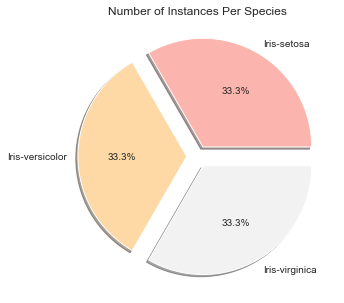

In [4]:
plt.figure(figsize = (5,5))
df['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%.1f%%',shadow=True,cmap = 'Pastel1')
plt.title('Number of Instances Per Species')
plt.ylabel(''); #To prevent label to overlap xtick

So we can that see all of them have the same number of instances. Our data is distrubuted evenly according to categories.

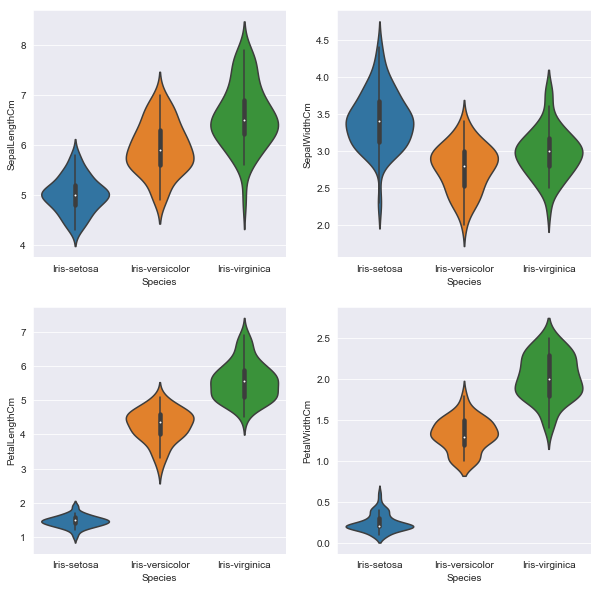

In [5]:
f, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.violinplot(x='Species', y='SepalLengthCm', data= df, scale='count', ax= axes[0,0])
sns.violinplot(x='Species', y='PetalLengthCm', data= df, scale='count', ax= axes[1,0])
sns.violinplot(x='Species', y='SepalWidthCm', data= df, scale='count', ax= axes[0,1])
sns.violinplot(x='Species', y='PetalWidthCm', data= df, scale='count', ax= axes[1,1]);

The violinplots for our data not only show the summary statstics of mean,median and inter-quartile ranges, but also give a good representation of how the data is distributed across the species. As there are no major outliers in our data on examination, a violin plots serves as a better tool than a boxplot for analysis. The thciker parts of the violin are where the data is more dense (higher frequency), giving us a good idea of the distribution of data.

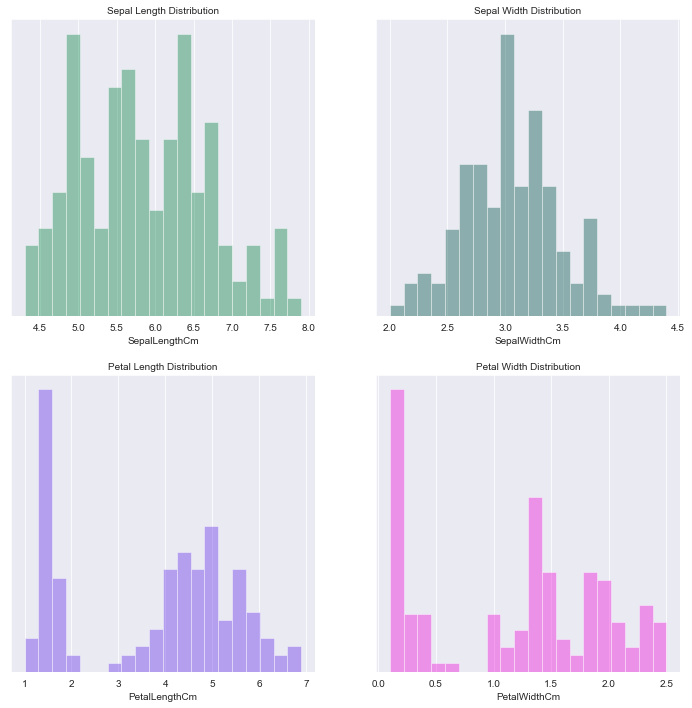

In [6]:
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(2,2,1)
sns.distplot(df['SepalLengthCm'], kde=False, color=sns.xkcd_rgb["jungle green"],bins = 20)
y_axis = ax1.axes.get_yaxis()
ax1.set_title('Sepal Length Distribution', fontsize=10)
y_axis.set_visible(False)

ax2 = fig.add_subplot(2,2,2)
sns.distplot(df['SepalWidthCm'], kde=False, color=sns.xkcd_rgb["dark blue green"],bins=20)
y_axis = ax2.axes.get_yaxis()
ax2.set_title('Sepal Width Distribution', fontsize=10)
y_axis.set_visible(False)

ax3 = fig.add_subplot(2,2,3)
sns.distplot(df['PetalLengthCm'], kde=False, color=sns.xkcd_rgb["purple blue"], bins=20)
y_axis = ax3.axes.get_yaxis()
ax3.set_title('Petal Length Distribution', fontsize=10)
y_axis.set_visible(False)

ax4 = fig.add_subplot(2,2,4)
sns.distplot(df['PetalWidthCm'], kde=False, color=sns.xkcd_rgb["fuchsia"], bins=20)
y_axis = ax4.axes.get_yaxis()
ax4.set_title('Petal Width Distribution', fontsize=10)
y_axis.set_visible(False)

This distplot serves as a great way to show the distributon of values for our 4 feature columns across a single variable (their lenghts/widths) in order to get a good representation of their frequency distributions.

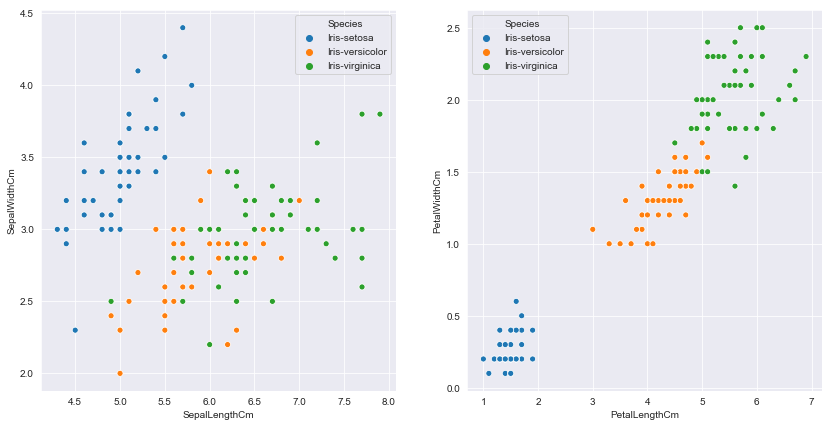

In [7]:
f, axes = plt.subplots(1, 2, figsize=(14, 7))
sns.scatterplot(x = 'SepalLengthCm',y = 'SepalWidthCm',hue = 'Species',data = df, ax=axes[0]);
sns.scatterplot(x = 'PetalLengthCm',y = 'PetalWidthCm',hue = 'Species',data = df, ax=axes[1]);

In the first plot we can see that Iris-Virginica are more likely to have a greater sepal length compared to the other Iris species, whereas Iris-Setosa are more likely to have more sepal width compared to the other Iris species. Lastly we can also note a strong positive correlation in each of these species between their Sepal Width and Sepal Length.

In the second plot we can see that all the species have a strong postive correlation between their petal widths and petal lengths, with Iris-virginica having the highest width and lengths and Iris-Setosa having the least.

In [8]:
x = df.drop(['Species','Id'],axis=1).values 
y = df['Species'].values
x_train, x_test, y_train, y_test = train_test_split (x,y,random_state = 1)

logreg =  LogisticRegression()
fitted= logreg.fit(x_train, y_train)
y_pred= logreg.predict(x_test)
print('The accuracy of our Logistics Regression model is:',round(accuracy_score(y_test,y_pred)*100,2),'%')

The accuracy of our Logistics Regression model is: 84.21 %


With a quick and dirty logistic regression model we have received an initial accuracy of 84.21%. Let us explore if there is a way to optimize this.

In [9]:
print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('Classification report: ')
print(classification_report(y_test,y_pred))

Confusion Matrix: 
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]


Classification report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.62      0.77        16
 Iris-virginica       0.60      1.00      0.75         9

      micro avg       0.84      0.84      0.84        38
      macro avg       0.87      0.88      0.84        38
   weighted avg       0.91      0.84      0.84        38



#### Confusion Matrix:

We can see that our model has correctly identified 13 instances off our test data for Iris-Setosa, 10 instances for Iris-Versicolor and 9 instances for Iris-Virginica. 6 instances were predicted as Iris-Viriginca but were actually Versicolor.

#### Classification Report:

Precision = TP/(TP + FP), for Iris-Setosa and Iris-Versicolor we have 1.00 which is an ideal score but for Iris-Viriginica we have 0.60 which is because our model would have predicted some instances as true positive but were actually false positive.

Recall = TP/(TP+FN), for Iris-Virginica and Iris-Setosa it is 1.00 which is ideal but for Iris-Versicolor it is 0.62 which means that there were some positive instances which our classifier could not identify.

F1 Score = 2(Recall Precision) / (Recall + Precision), it is a weighted harmonic mean for precision and recall and on the basis of our precision and recall, f1-score for Iris-Setosa is 1.00, for Iris-Versicolor it is 0.77 since our recall was only 0.62 and for Iris-Virginica we have 0.75 since the precision was only 0.60

In [10]:
#kfold cross validation to increase accuracy further
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')

print(scores.mean())

0.9666666666666668


In [11]:
#Using gridsearchCV to get optimal n_neighbors
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 21))
params = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, params, cv=10, scoring='accuracy')

grid.fit(x, y)
print(grid.best_params_)
print('The accuracy of our K-Nearest Neighbor model is:',round(grid.best_score_*100,2),'%')

{'n_neighbors': 13}
The accuracy of our K-Nearest Neighbor model is: 98.0 %


We have received an accuracy of 98%! Looks like our model did really well!